# FeedForward Neural Network with Softmax+CrossEntropy

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import numpy as np


In [ ]:
# 1. Hyper Parameter
train_size = 784
num_classes = 10
hidden1_size = 500
learning_rate = 0.001

batch_size = 100
ephoc_size = 5


In [ ]:
# 2. Data load
# MNIST Dataset 
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),  
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [ ]:
# 2-1. 샘플 데이터 확인
print(train_dataset)
# dataset.__getitem__(idx)
image,label = train_dataset.__getitem__(0)
print(image.size(),label)

# dataset[idx]
image,label = train_dataset[0]
print(image.size(),label)
print(image)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()
torch.Size([1, 28, 28]) 5
torch.Size([1, 28, 28]) 5
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.

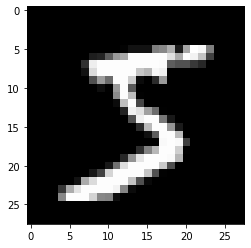

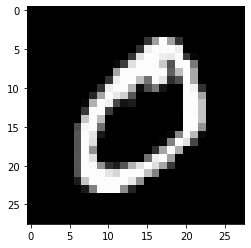

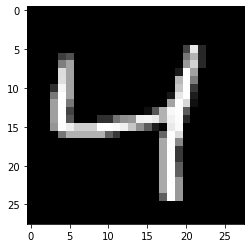

In [ ]:
# 2-2. 샘플 데이터 출력
for i in range(3):
    img= train_dataset[i][0].numpy()
    plt.imshow(img[0],cmap='gray')
    plt.show()

In [ ]:
# 3. Build the Model
class FeedForwardNN(nn.Module):
    def __init__(self, train_size, hidden1_size, num_classes):
        super(FeedForwardNN, self).__init__()

        self.linear1 = nn.Linear(train_size, hidden1_size)
        ## 코드를 작성해 보세요!! 힌트: W의 갯수가 몇개죠?
        self.relu = nn.ReLU()
        ##  코드를 작성해 보세요!!
        self.linear2 = nn.Linear(hidden1_size, num_classes)
        ## 코드를 작성해 보세요!! 힌트: 몇개의 데이터가 최종적으로 반환되어야 할까요?
        
    def forward(self, x):
        
        lin1 = self.linear1(x)
        lin1_relu = self.relu(lin1)
        z2 = self.linear2(lin1_relu)
        #z2 = 코드를 작성해 보세요
        
        return z2
        

In [ ]:
# 4. Generate a model
model = FeedForwardNN(train_size, hidden1_size, num_classes) #코드를 작성해 보세요

In [ ]:
# 5. Init loss function and Optimizer
loss_function = nn.CrossEntropyLoss() #코드를 작성해 보세요
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# 6. Train
for ephoc in range(ephoc_size):
    print("ephoc: ",ephoc)
    for idx, (images, labels) in enumerate(train_loader):
        #convert dataset as the Pytorch style
        images = images.view(-1, 28*28)
        #코드를 작성해 보세요 images.view(?,?) 힌트: W의 갯수와 images의 벡터 사이즈는 같아야 하겠죠? 이때 view함수는 2차원 매트릭스를 1차원으로 변경 가능합니다.
        labels = labels
        
        #Forward, Backward, gradient
        optimizer.zero_grad()
        outputs = model.forward(images) #코드를 작성해 보세요
        loss = loss_function(outputs, labels) #코드를 작성해 보세요
        loss.backward #코드를 작성해 보세요 힌트: backpropagation을 하려면 어떤 함수를 호출해야 할까요?
        optimizer.step()
        
        if idx%100 == 0:
            print("ephoc[",ephoc,"] \t", "loss:", loss.item())
            

ephoc:  0
ephoc[ 0 ] 	 loss: 2.301162004470825
ephoc[ 0 ] 	 loss: 2.2953975200653076
ephoc[ 0 ] 	 loss: 2.31851863861084
ephoc[ 0 ] 	 loss: 2.307300090789795
ephoc[ 0 ] 	 loss: 2.307361602783203
ephoc[ 0 ] 	 loss: 2.3069281578063965
ephoc:  1
ephoc[ 1 ] 	 loss: 2.305452346801758
ephoc[ 1 ] 	 loss: 2.3033807277679443
ephoc[ 1 ] 	 loss: 2.3230254650115967
ephoc[ 1 ] 	 loss: 2.2906618118286133
ephoc[ 1 ] 	 loss: 2.307321786880493
ephoc[ 1 ] 	 loss: 2.287780284881592
ephoc:  2
ephoc[ 2 ] 	 loss: 2.314295530319214
ephoc[ 2 ] 	 loss: 2.3009612560272217
ephoc[ 2 ] 	 loss: 2.323411226272583
ephoc[ 2 ] 	 loss: 2.3125362396240234
ephoc[ 2 ] 	 loss: 2.3156862258911133
ephoc[ 2 ] 	 loss: 2.309609889984131
ephoc:  3
ephoc[ 3 ] 	 loss: 2.3002164363861084
ephoc[ 3 ] 	 loss: 2.3026371002197266
ephoc[ 3 ] 	 loss: 2.2961413860321045
ephoc[ 3 ] 	 loss: 2.3145508766174316
ephoc[ 3 ] 	 loss: 2.293048143386841
ephoc[ 3 ] 	 loss: 2.3156845569610596
ephoc:  4
ephoc[ 4 ] 	 loss: 2.3194468021392822
ephoc[ 4 ] 	

In [ ]:
#Test the model
total = 0
correct = 0
for images, labels in test_loader:
    images = Variable(images.view(-1,28*28))

    outputs = model(images)   
    _, predicted = torch.max(outputs.data, 1)
    total += len(predicted)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 10 %
